# DSAI 2201 Winter 2024 Assignment

In [1]:
NAME = "Manahil Sheikh"

COLLABORATORS = ""

## Assignment 1 - Data Analysis
**(20 points in total)**

In Assignments part 1 & part 2 we will go through the entire journey of a small data science project.

More details about the dataset can be found in the Kaggle website in the following links: https://www.kaggle.com/datasets/reihanenamdari/breast-cancer

But a modified version of the dataset was attached in the dropbox, please use it to answer this assignment
     



**Question 1.**  _(2 points)_
* A) Analyze the distribution of death events cases among the patients and the race. calculate their respective numbers and percentages.  _(0.5 points)_
* B) Compute descriptive statistics of the data. Comment on the results.  _(0.75 points)_
* C) Analyze the skew and the kurtosis of medical variables distributions(Numbers & Graphs). Comment on the results.  _(0.75  points)_

**Question 2.**  _(2 points)_
* Use univariate plots  to analyze patterns in each of the medical variables with respect to the outcome (death status). What categories of patients( race and marital status) were most likely to die from breast cancer? . (2 points)


**Question 3.**  _(2 points)_
* Use multivariate plots to:
   * A) Analyze the relationship between medical variables.  _(1 points)_
   * B) Identify potential factors that can predict Death event in married patients. Comment on the results.  _(1 points)_

**Question 4.**  _(3 points)_
* Identify and remove any outliers in the medical variables. Explain the rationale for identifying and removing outliers.  _(3 points)_

**Question 5.**  _(3 points)_
* How did you treat missing values for the attributes that you included in the analysis ? Provide a detailed explanation in the comments._(3 points)_

**Question 6.**  _(3 points)_
* The dataset contains  contains alot of zeros, identify which attributes cannot be 0 medically speaking, and impute them, while explaining the rational behind it._(3 points)_


**Question 7.**  _(2 points)_
* Identify the attibutes that will need rescalling ( with explanation ), apply one of the rescalling techniques we have seen in our course and explain your rational. _(2 points)_

**Question 8.**  _(3 points)_
* Through an extensive research, provide additional attributes that you can create that will enhance your dataset, explain the logic behind it, and add them to your data, _(1.5 points)_
* identify the most irrelevant attribute(s), and exclude them from your project for the next steps  _(1.5 points)_

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("Breast_Cancer.csv")
df.tail(10)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4014,40,White,Married,T3,N1,IIIA,Moderately differentiated,2,Regional,68.0,Positive,Positive,22,2,86.0,Alive
4015,65,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,40.0,Positive,Positive,4,4,68.0,Alive
4016,54,White,Married,T2,N1,IIB,Well differentiated,1,Regional,50.0,Positive,Positive,29,2,52.0,Alive
4017,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,28.0,Negative,Negative,2,1,19.0,Dead
4018,64,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,10.0,Positive,Positive,11,1,70.0,Alive
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9.0,Positive,Positive,1,1,49.0,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46.0,Positive,Positive,14,8,69.0,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22.0,Positive,Negative,11,3,69.0,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44.0,Positive,Positive,11,1,72.0,Alive
4023,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30.0,Positive,Positive,7,2,100.0,Alive


In [3]:
#Renaming some columns

df.rename(columns = {"T Stage ": "t_stage", "N Stage": "n_stage", "A Stage": "a_stage", 
                     "Reginol Node Positive": "Regional Node Positive", "6th Stage": "6th_stage"}, inplace= True)
df["differentiate"].replace({"Moderately differentiated": "Moderate", "Poorly differentiated": "Poor", 
                             "Well differentiated": "Well"}, inplace = True)
df.columns.tolist()

['Age',
 'Race',
 'Marital Status',
 't_stage',
 'n_stage',
 '6th_stage',
 'differentiate',
 'Grade',
 'a_stage',
 'Tumor Size',
 'Estrogen Status',
 'Progesterone Status',
 'Regional Node Examined',
 'Regional Node Positive',
 'Survival Months',
 'Status']

## Q1:
**Question 1.**  _(2 points)_
* A) Analyze the distribution of death events cases among the patients and the race. calculate their respective numbers and percentages.  _(0.5 points)_
* B) Compute descriptive statistics of the data. Comment on the results.  _(0.75 points)_
* C) Analyze the skew and the kurtosis of medical variables distributions(Numbers & Graphs). Comment on the results.  _(0.75  points)_

Solution:



In [4]:
#A) Analyze the distribution of death events cases among the patients and the race. 
#   Calculate their respective numbers and percentages

death_counts = df[["Race","Status"]].groupby(["Race"])

print(f"The number of deaths among patients of different races:\n")
print(f"{death_counts.value_counts().unstack()}\n")
      
print(f"The percentage of deaths among patients of different races:\n")
print(f"{round(death_counts.value_counts(normalize = True).unstack() * 100,2)}")

The number of deaths among patients of different races:

Status  Alive  Dead
Race               
Black     218    73
Other     287    33
White    2903   510

The percentage of deaths among patients of different races:

Status  Alive   Dead
Race                
Black   74.91  25.09
Other   89.69  10.31
White   85.06  14.94


In [5]:
#B) Compute descriptive statistics of the data. Comment on the results.

df.describe()

,Age,Tumor Size,Regional Node Examined,Regional Node Positive,Survival Months
count,4024.000000,4018.000000,4024.000000,4024.000000,4017.000000
mean,53.972167,30.422101,14.357107,4.158052,71.173762
std,8.963134,21.154352,8.099675,5.109331,23.089655
min,30.000000,0.000000,1.000000,1.000000,0.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


Comments:
The count indicates that some Tumor Size and Survival months value are missing, which need to be imputed.
The median and mean values suggest that outliers may lie in the Tumor Size,  Regional Node Examined, Regional Node Positive and Suvival Months columns.

In [6]:
#Looking for columns with missing values
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
t_stage                   5
n_stage                   0
6th_stage                 0
differentiate             6
Grade                     0
a_stage                   0
Tumor Size                6
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Regional Node Positive    0
Survival Months           7
Status                    0
dtype: int64

In [7]:
#Imputing missing values
df["differentiate"].fillna(df["differentiate"].mode()[0], inplace = True)

df["t_stage"].fillna(df["t_stage"].mode()[0], inplace = True)

df["Tumor Size"].fillna(df["Tumor Size"].median(), inplace= True)

df["Survival Months"].fillna(df["Survival Months"].median(), inplace= True)

In [8]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
t_stage                   0
n_stage                   0
6th_stage                 0
differentiate             0
Grade                     0
a_stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Regional Node Positive    0
Survival Months           0
Status                    0
dtype: int64

In [9]:
#Checking for and removing duplicate rows
df.duplicated().sum()

1

In [10]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [11]:
#C) Analyze the skew and the kurtosis of medical variables distributions(Numbers & Graphs). Comment on the results.

print("The Numerical Skew and Kurtosis of Medical Variables:")
numerical_df = df.select_dtypes(include = np.number)
numerical_cols = numerical_df.columns
numerical_df.agg(['skew','kurt'])

The Numerical Skew and Kurtosis of Medical Variables:


,Age,Tumor Size,Regional Node Examined,Regional Node Positive,Survival Months
skew,-0.219932,1.737863,0.828885,2.702183,-0.612475
kurt,-0.754989,3.632690,1.648586,8.978869,0.076445


The Graphical Skew of Medical Variables:


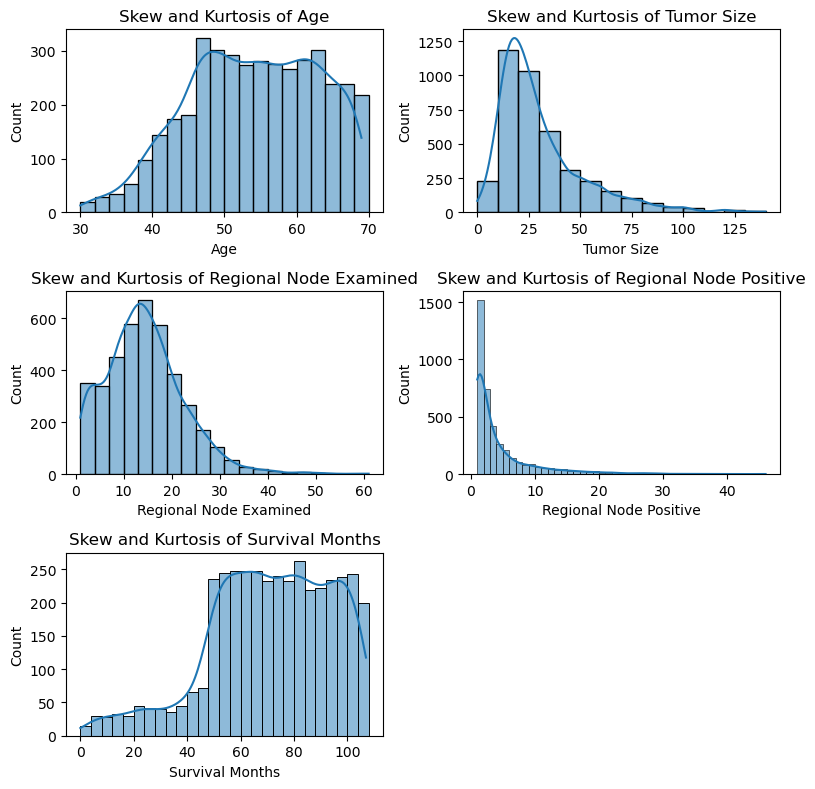

In [12]:
print("The Graphical Skew of Medical Variables:")
plt.figure(figsize = (8,8))

plt.subplot(3,2,1) #3 rows, 2 columns
age = df["Age"]
bin_edges = np.arange(min(age), max(age)+2,2)
sns.histplot(age, kde = True, bins = bin_edges)
plt.title("Skew and Kurtosis of Age")

plt.subplot(3,2,2)
tumor_size = df["Tumor Size"]
bin_edges = np.arange(min(tumor_size), max(tumor_size)+10,10)
sns.histplot(tumor_size, kde = True, bins = bin_edges)
plt.title("Skew and Kurtosis of Tumor Size")

plt.subplot(3,2,3)
regional_node_examined = df["Regional Node Examined"]
bin_edges = np.arange(min(regional_node_examined), max(regional_node_examined)+3,3)
sns.histplot(regional_node_examined, kde = True, bins = bin_edges)
plt.title("Skew and Kurtosis of Regional Node Examined")

plt.subplot(3,2,4)
regional_node_positive = df["Regional Node Positive"]
bin_edges = np.arange(min(regional_node_positive), max(regional_node_positive)+1,1)
sns.histplot(regional_node_positive, kde = True, bins = bin_edges)
plt.title("Skew and Kurtosis of Regional Node Positive")

plt.subplot(3,2,5)
survival_months = df["Survival Months"]
bin_edges = np.arange(min(survival_months), max(survival_months)+4,4)
sns.histplot(survival_months, kde = True, bins = bin_edges)
plt.title("Skew and Kurtosis of Survival Months")

plt.tight_layout()
plt.show()

Comments: The kde line is indicative of the skewness and kurtosis of each column.

The Age and Survival Months columns are skewed to the left (negative skew), whereas the Tumor Size, Regional Node Positive, and Regional Node Examined are skewed right (positive skew).

###  Q2:

**Question 2.**  _(2 points)_
* Use univariate plots  to analyze patterns in each of the medical variables with respect to the outcome (death status). What categories of patients( race and marital status) were most likely to die from breast cancer? . (2 points)

Solution:

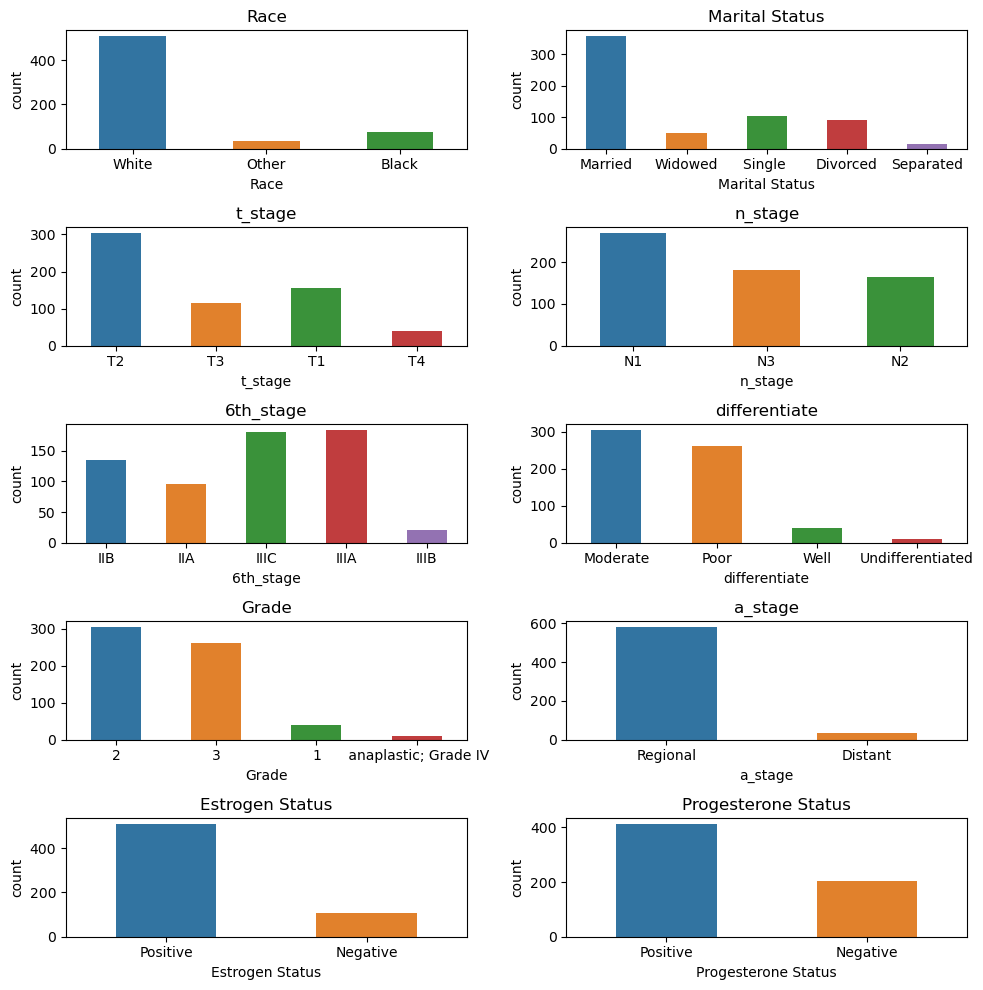

In [13]:
#Use univariate plots to analyze patterns in each of the medical variables with respect to the outcome (death status).

#New Dataframe containing only dead patients
death_df = df[df["Status"] == "Dead"]

def create_count_plots(df,columns):
    i = 1
    for col in columns:
        plt.subplot(5,2,i)
        sns.countplot(x = df[col], width = 0.5)
        plt.title( col)
        plt.xlabel(col)
        i += 1

cols = ["Race", "Marital Status", "t_stage", "n_stage", "6th_stage", "differentiate", "Grade", "a_stage", "Estrogen Status",
        "Progesterone Status"]
plt.figure(figsize = (10,10))
create_count_plots(death_df,cols)
plt.tight_layout()
plt.show()

In [14]:
#What categories of patients( race and marital status) were most likely to die from breast cancer?

#Number of dead and alive people for each race and marital status
race_stat = df.groupby(["Race","Status"]).size().unstack()
marital_status_stat = df.groupby(["Marital Status","Status"]).size().unstack()

In [15]:
#Total number of people for each race and marital status
total_race = race_stat.sum(axis = 1)
total_marital_status = marital_status_stat.sum(axis = 1)

In [16]:
print("Percentage of Deaths based on Race:\n", round(race_stat.div(total_race, axis = 0)*100))
print("\nPercentage of Deaths based on Marital Status:\n", round(marital_status_stat.div(total_marital_status, axis = 0)*100))

Percentage of Deaths based on Race:
 Status  Alive  Dead
Race               
Black    75.0  25.0
Other    90.0  10.0
White    85.0  15.0

Percentage of Deaths based on Marital Status:
 Status          Alive  Dead
Marital Status             
Divorced         81.0  19.0
Married          86.0  14.0
Separated        67.0  33.0
Single           83.0  17.0
Widowed          79.0  21.0


Comments: The "Other" race and the "Married" marital status experienced the most deaths amongst patients

###  Q3:

**Question 3.**  _(2 points)_
* Use multivariate plots to:
   * A) Analyze the relationship between medical variables. _(1 points)_
   * B) Identify potential factors that can predict Death event in married patients. Comment on the results.  _(1 points)_


C:\Users\manah\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


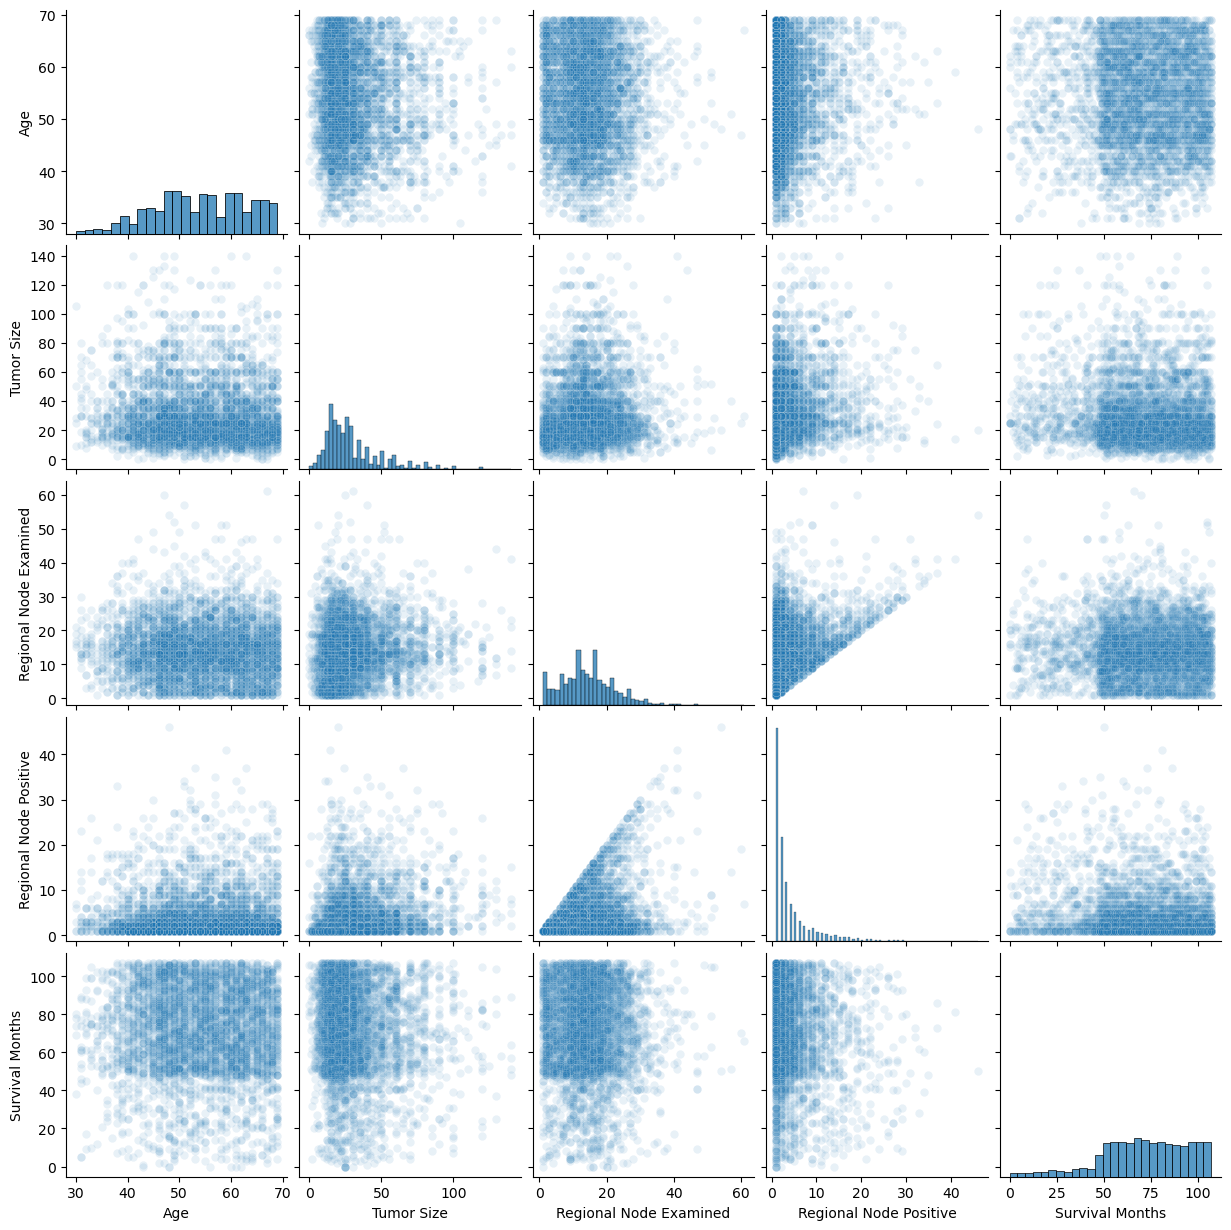

In [17]:
#A) Analyze the relationship between medical variables

sns.pairplot(numerical_df, kind = "scatter", plot_kws = {"alpha": 0.1})
plt.show()

Comments: There is no apparent correlation between any of the medical variables :/

In [18]:
#B) Identify potential factors that can predict Death event in married patients

#Creating new dataFrame for dead, married patients
married_death_df = death_df[(death_df["Marital Status"] == "Married")]
married_death_df.head()

,Age,Race,Marital Status,t_stage,n_stage,6th_stage,differentiate,Grade,a_stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
7,40,White,Married,T2,N1,IIB,Moderate,2,Regional,30.0,Positive,Positive,9,1,73.0,Dead
46,42,White,Married,T1,N3,IIIC,Moderate,2,Regional,9.0,Negative,Negative,15,2,39.0,Dead
66,31,White,Married,T3,N3,IIIC,Poor,3,Regional,70.0,Positive,Positive,23,23,44.0,Dead
71,64,White,Married,T2,N3,IIIC,Poor,3,Regional,34.0,Positive,Negative,24,20,12.0,Dead
90,53,White,Married,T3,N1,IIIA,Poor,3,Regional,60.0,Positive,Positive,8,1,91.0,Dead


In [19]:
#Correlation of each medical variable with each other
corr_matrix = married_death_df[numerical_cols].corr()
corr_matrix

,Age,Tumor Size,Regional Node Examined,Regional Node Positive,Survival Months
Age,1.000000,-0.156124,-0.098603,-0.066109,-0.009864
Tumor Size,-0.156124,1.000000,0.133237,0.157001,-0.092089
Regional Node Examined,-0.098603,0.133237,1.000000,0.606211,-0.085641
Regional Node Positive,-0.066109,0.157001,0.606211,1.000000,-0.087076
Survival Months,-0.009864,-0.092089,-0.085641,-0.087076,1.000000


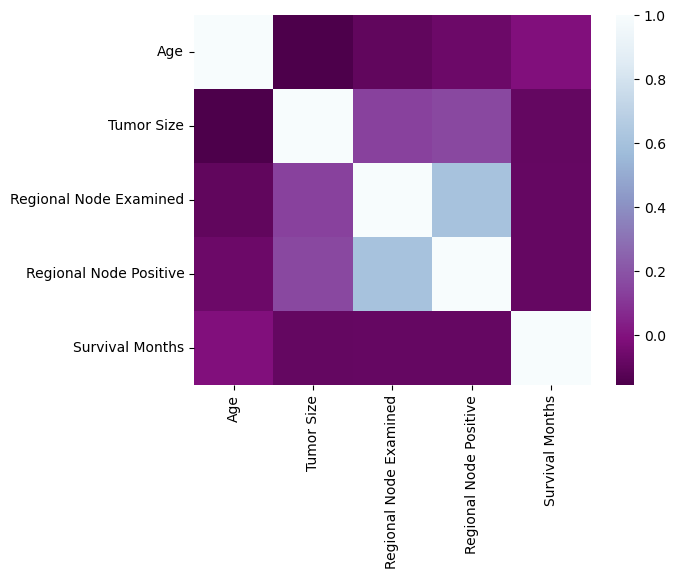

In [20]:
#Heatmap of correlation matrix
sns.heatmap(corr_matrix, cmap = "BuPu_r");

Comments: Most columns have slight negative, or slight positive correlations, but the Regional Node Positive and Regional Node Examind have a moderately positive correlation.

###  Q4:
**Question 4.**  _(3 points)_
* Identify and remove any outliers in the medical variables. Explain the rationale for identifying and removing outliers.  _(3 points)_

Solution:
Removing outliers is a necessary part of data cleaning since it ensures the removal of potential extreme or erroneous values, such as accidental inputs, before the dataset can be used for testing. Leaving in outliers can result in a skewed mean, impacting the measures of central tendency and providing influenced overall results.

The IQR method was initially used on all numerical columns to get rid of outliers, however, some columns still had extreme values left over, which were then imputed using winsorization.


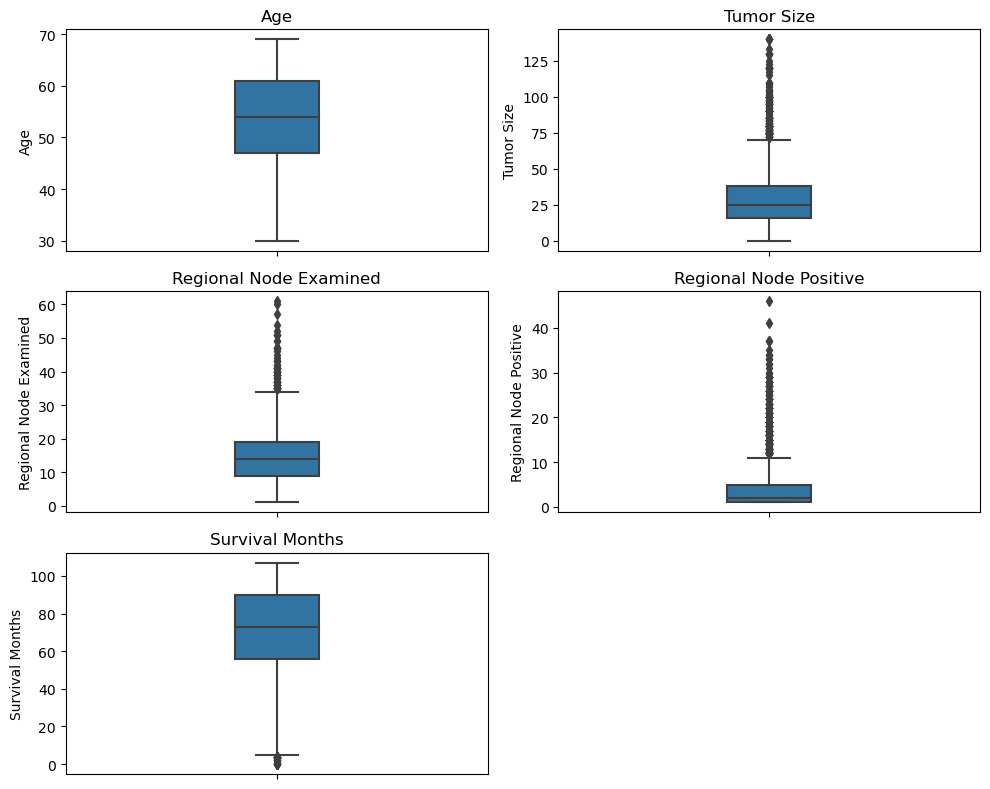

In [21]:
#Identifying outliers in the medical variables
def create_box_plots(df,columns):
    i = 1
    for col in columns:
        plt.subplot(3,2,i)
        sns.boxplot(y = df[col], width = 0.2)
        plt.title(col)
        plt.ylabel(col)
        i += 1

plt.figure(figsize = (10,8))
create_box_plots(df, numerical_cols)
plt.tight_layout()
plt.show()

In [22]:
# Applying a function to remove the outliers in numerical columns

def removeOutliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper) ]
    return df

cleaned_df = removeOutliers(df, numerical_cols )

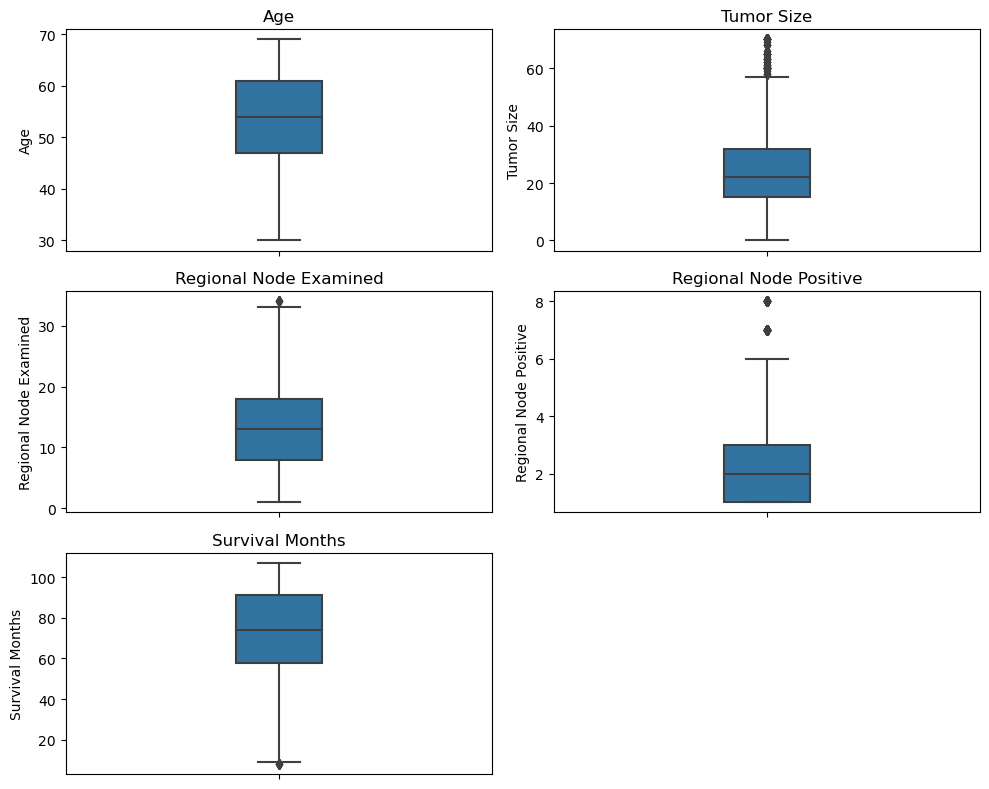

In [23]:
plt.figure(figsize = (10,8))
create_box_plots(cleaned_df, numerical_cols)
plt.tight_layout()
plt.show()

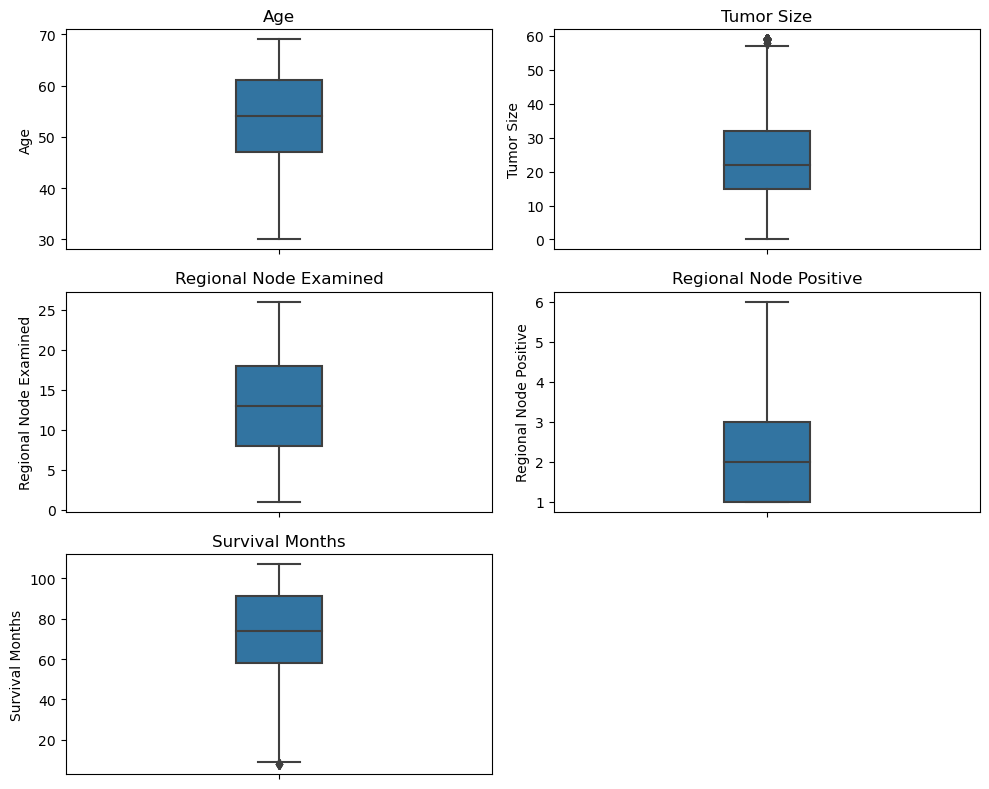

In [24]:
#Winsorization to remove remaining outliers

from scipy.stats.mstats import winsorize

cleaned_df["Tumor Size"] = winsorize(cleaned_df["Tumor Size"].values, [0.0, 0.05])

cleaned_df["Regional Node Examined"] = winsorize(cleaned_df["Regional Node Examined"].values, [0.0, 0.05])

cleaned_df["Regional Node Positive"] = winsorize(cleaned_df["Regional Node Positive"].values, [0.0, 0.05])

plt.figure(figsize = (10,8))
create_box_plots(cleaned_df, numerical_cols)
plt.tight_layout()
plt.show()


Comments: 771 rows containing outliers were removed

###  Q5:

**Question 5.**  _(3 points)_
* How did you treat missing values for the attributes that you included in the analysis ? Provide a detailed explanation in the comments._(3 points)_

Explanation: The descriptive summary of the dataset and further observations show us that there were some missing values in the "Tumor Size", "Survival Months", "T Stage" and "Differentiate" columns. Due to the percentage of null values being below 20%, and due to the importance of all these columns, deleting rows values would lead to the loss of crucial information. For that reason, I chose to impute missing fields with the median for numerical columns, as there were still outliers present that could influence their mean value, and the first mode for categorical columns.

###  Q6:

**Question 6.**  _(3 points)_
* The dataset contains  contains alot of zeros, identify which attributes cannot be 0 medically speaking, and impute them, while explaining the rational behind it._(3 points)_

In [25]:
#Checkign zero values
cleaned_df[(cleaned_df.values == 0) | (cleaned_df.values == '0')]

,Age,Race,Marital Status,t_stage,n_stage,6th_stage,differentiate,Grade,a_stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
21,57,White,Married,T2,N2,IIIA,Moderate,2,Regional,40.0,Positive,0,15,5,50.0,Alive
22,55,White,Single,T2,N1,IIB,Poor,3,Regional,29.0,Positive,0,4,1,78.0,Alive
23,48,White,Married,T3,N1,IIIA,Poor,3,Regional,59.0,Positive,0,18,1,102.0,Alive
73,66,White,Married,T1,N1,IIA,Moderate,2,Regional,0.0,Positive,Positive,15,1,98.0,Alive
75,56,White,Married,T3,N1,IIIA,Moderate,2,Regional,0.0,Positive,Positive,13,1,95.0,Alive
76,66,White,Single,T2,N2,IIIA,Moderate,2,Regional,0.0,Positive,Positive,11,4,79.0,Alive
77,42,White,Married,T2,N1,IIB,Moderate,2,Regional,0.0,Positive,Positive,7,1,106.0,Alive
78,51,White,Married,T2,N1,IIB,Well,1,Regional,0.0,Positive,Positive,9,1,81.0,Alive


In [26]:
#Imputing zero values in the Progesterone Status column
cleaned_df["Progesterone Status"].replace("0","Negative", inplace = True)

cleaned_df["Progesterone Status"].value_counts()

Progesterone Status
Positive    2738
Negative     514
Name: count, dtype: int64

Comments: The Progesterone Status can either be positive or negative, so having a value of 0 could be interpreted as it being negative.

In [27]:
#Imputing zero values in the Tumor Size column

def replace_zero(df, col):
    stages = col.unique()
    for stage in stages:
        select = df[col == stage]
        df.replace(0, select["Tumor Size"].median(), inplace = True)

replace_zero(cleaned_df, cleaned_df["t_stage"])

cleaned_df[cleaned_df["Tumor Size"] == 0]

,Age,Race,Marital Status,t_stage,n_stage,6th_stage,differentiate,Grade,a_stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status


Comments: Having a tumor size of 0 would imply that the tumor doesn't exist, which is why i chose to use the median value of tumor size for each t stage to replace these 0's, since each t stage has a different size range.

In [28]:
#Imputing some values found in Grade column (extra)
cleaned_df["Grade"].value_counts()

Grade
2                        1946
3                         826
1                         470
 anaplastic; Grade IV      10
Name: count, dtype: int64

In [29]:
cleaned_df["Grade"].replace({" anaplastic; Grade IV": 4}, inplace = True)
cleaned_df["Grade"].value_counts()

Grade
2    1946
3     826
1     470
4      10
Name: count, dtype: int64

###  Q7:
**Question 7.**  _(2 points)_
* Identify the attibutes that will need rescalling ( with explanation ), apply one of the rescalling techniques we have seen in our course and explain your rational. _(2 points)_


In [30]:
#Using Sci-Kit learn's MinMaxScaler.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cols = ["Age", "Tumor Size", "Survival Months"]
scaled_df = scaler.fit_transform(cleaned_df[cols].to_numpy())
scaled_df = pd.DataFrame(scaled_df, columns = cols)
scaled_df.rename( columns = {"Age": "scaled_age", "Tumor Size": "scaled_tumor_size", 
                             "Survival Months": "scaled_survival_months"}, inplace = True)
scaled_df

,scaled_age,scaled_tumor_size,scaled_survival_months
0,0.974359,0.051724,0.525253
1,0.512821,0.586207,0.545455
2,0.717949,1.000000,0.676768
3,0.717949,0.293103,0.656566
4,0.435897,0.689655,0.656566
...,...,...,...
3247,0.820513,0.137931,0.414141
3248,0.666667,0.775862,0.616162
3249,0.974359,0.362069,0.616162
3250,0.717949,0.741379,0.646465


In [31]:
print(scaled_df.min())
print(scaled_df.max())

scaled_age                0.0
scaled_tumor_size         0.0
scaled_survival_months    0.0
dtype: float64
scaled_age                1.0
scaled_tumor_size         1.0
scaled_survival_months    1.0
dtype: float64


Comments: Rescaling the age, tumor size and survival months columns will make it so that each of these values can be compared to each other with ease, since each column can now be represented on a scale of 0 to 1 in accordance to their original values. This will also make it easier for machine learning algorithms to make more accurate predictions in the future.

###  Q8 :

**Question 8.**  _(3 points)_
* Through an extensive research, provide additional attributes that you can create that will enhance your dataset, explain the logic behind it, and add them to your data, _(1.5 points)_
* identify the most irrelevant attribute(s), and exclude them from your project for the next steps  _(1.5 points)_
Solution



In [32]:
#One_Hot encoding
encoded_df = pd.get_dummies(cleaned_df, columns = ["t_stage", "n_stage", "6th_stage", "differentiate", "a_stage"],
                              dtype = int)
encoded_df

,Age,Race,Marital Status,Grade,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,...,6th_stage_IIB,6th_stage_IIIA,6th_stage_IIIB,6th_stage_IIIC,differentiate_Moderate,differentiate_Poor,differentiate_Undifferentiated,differentiate_Well,a_stage_Distant,a_stage_Regional
0,68,White,Married,3,4.0,Positive,Positive,24,1,60.0,...,0,0,0,0,0,1,0,0,0,1
1,50,White,Married,2,35.0,Positive,Positive,14,5,62.0,...,0,1,0,0,1,0,0,0,0,1
2,58,White,Divorced,2,59.0,Positive,Positive,14,6,75.0,...,0,0,0,1,1,0,0,0,0,1
3,58,White,Married,3,18.0,Positive,Positive,2,1,73.0,...,0,0,0,0,0,1,0,0,0,1
4,47,White,Married,3,41.0,Positive,Positive,3,1,73.0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,2,9.0,Positive,Positive,1,1,49.0,...,0,0,0,0,1,0,0,0,0,1
4020,56,White,Divorced,2,46.0,Positive,Positive,14,6,69.0,...,0,1,0,0,1,0,0,0,0,1
4021,68,White,Married,2,22.0,Positive,Negative,11,3,69.0,...,1,0,0,0,1,0,0,0,0,1
4022,58,Black,Divorced,2,44.0,Positive,Positive,11,1,72.0,...,1,0,0,0,1,0,0,0,0,1


Comments: One-Hot encoding allows the use of categorical data in machine learning algorithms by creating individual columns for the unique values in each column. Having additional medical information about the patients, such as their past medical history, ongoing chemotherapy treatment(s) and type of breast cancer could all be crucial in making the necessary predictions.

In [33]:
#Dropping irrelevent columns
new_df = encoded_df.drop(columns = ["Race", "Marital Status"], axis = 1)
new_df

,Age,Grade,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status,t_stage_T1,...,6th_stage_IIB,6th_stage_IIIA,6th_stage_IIIB,6th_stage_IIIC,differentiate_Moderate,differentiate_Poor,differentiate_Undifferentiated,differentiate_Well,a_stage_Distant,a_stage_Regional
0,68,3,4.0,Positive,Positive,24,1,60.0,Alive,1,...,0,0,0,0,0,1,0,0,0,1
1,50,2,35.0,Positive,Positive,14,5,62.0,Alive,0,...,0,1,0,0,1,0,0,0,0,1
2,58,2,59.0,Positive,Positive,14,6,75.0,Alive,0,...,0,0,0,1,1,0,0,0,0,1
3,58,3,18.0,Positive,Positive,2,1,73.0,Alive,1,...,0,0,0,0,0,1,0,0,0,1
4,47,3,41.0,Positive,Positive,3,1,73.0,Alive,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,2,9.0,Positive,Positive,1,1,49.0,Alive,1,...,0,0,0,0,1,0,0,0,0,1
4020,56,2,46.0,Positive,Positive,14,6,69.0,Alive,0,...,0,1,0,0,1,0,0,0,0,1
4021,68,2,22.0,Positive,Negative,11,3,69.0,Alive,0,...,1,0,0,0,1,0,0,0,0,1
4022,58,2,44.0,Positive,Positive,11,1,72.0,Alive,0,...,1,0,0,0,1,0,0,0,0,1


In [34]:
#Converting categorical boolean values to numerical
new_df.replace({"Positive": 1, "Negative": 0, "Alive": 1, "Dead": 0}, inplace = True)
new_df.reset_index(drop = True)


,Age,Grade,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status,t_stage_T1,...,6th_stage_IIB,6th_stage_IIIA,6th_stage_IIIB,6th_stage_IIIC,differentiate_Moderate,differentiate_Poor,differentiate_Undifferentiated,differentiate_Well,a_stage_Distant,a_stage_Regional
0,68,3,4.0,1,1,24,1,60.0,1,1,...,0,0,0,0,0,1,0,0,0,1
1,50,2,35.0,1,1,14,5,62.0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,58,2,59.0,1,1,14,6,75.0,1,0,...,0,0,0,1,1,0,0,0,0,1
3,58,3,18.0,1,1,2,1,73.0,1,1,...,0,0,0,0,0,1,0,0,0,1
4,47,3,41.0,1,1,3,1,73.0,1,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3247,62,2,9.0,1,1,1,1,49.0,1,1,...,0,0,0,0,1,0,0,0,0,1
3248,56,2,46.0,1,1,14,6,69.0,1,0,...,0,1,0,0,1,0,0,0,0,1
3249,68,2,22.0,1,0,11,3,69.0,1,0,...,1,0,0,0,1,0,0,0,0,1
3250,58,2,44.0,1,1,11,1,72.0,1,0,...,1,0,0,0,1,0,0,0,0,1


# Assignment 2 - Machine Learning Models for Prediction
**(15 points total)**

 
* In **Assignment 1**, we have explored the data, cleaned up the data, modified features, and created new ones. 
* In **Assignment 2**, we will apply supervised machine learning models for classification and regression, evaluate its perofrmance, and identify the best models to solve the following problems: 

    * The **classification problem** is: given a train dataset of patients who survived or did not survive, build a model which can determine based on a given test dataset not containing the death event information information, if these patients in the test dataset survived or not. 

    * The **regression problem** is: predict the number of months that remains for the survival of the patient.



**Question 1. (Data preparation)**  _(2 points)_
* List the relevant features which you will use for classification and explain your answer (*a relevant feature is a feature that can have an impact on the chance of survival of the patient*).
* List the relevant features which you will use for regression and explain your answer (*a relevant feature is a feature that can have an impact on the prediction of the number of remaining survival months of the patient*).
* Divide both your datasets into a training set (70%) and a testing set (30%). All models will be trained and tested on the same splits.
    





###  Data Preparation & Spliting for the Classification Model

In [35]:
new_df.reset_index(drop = True, inplace = True)
new_df

,Age,Grade,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status,t_stage_T1,...,6th_stage_IIB,6th_stage_IIIA,6th_stage_IIIB,6th_stage_IIIC,differentiate_Moderate,differentiate_Poor,differentiate_Undifferentiated,differentiate_Well,a_stage_Distant,a_stage_Regional
0,68,3,4.0,1,1,24,1,60.0,1,1,...,0,0,0,0,0,1,0,0,0,1
1,50,2,35.0,1,1,14,5,62.0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,58,2,59.0,1,1,14,6,75.0,1,0,...,0,0,0,1,1,0,0,0,0,1
3,58,3,18.0,1,1,2,1,73.0,1,1,...,0,0,0,0,0,1,0,0,0,1
4,47,3,41.0,1,1,3,1,73.0,1,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3247,62,2,9.0,1,1,1,1,49.0,1,1,...,0,0,0,0,1,0,0,0,0,1
3248,56,2,46.0,1,1,14,6,69.0,1,0,...,0,1,0,0,1,0,0,0,0,1
3249,68,2,22.0,1,0,11,3,69.0,1,0,...,1,0,0,0,1,0,0,0,0,1
3250,58,2,44.0,1,1,11,1,72.0,1,0,...,1,0,0,0,1,0,0,0,0,1


In [36]:
#List the relevant features which you will use for classification and explain your answer 
features = pd.concat([scaled_df, new_df], axis = 1)
features

,scaled_age,scaled_tumor_size,scaled_survival_months,Age,Grade,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,...,6th_stage_IIB,6th_stage_IIIA,6th_stage_IIIB,6th_stage_IIIC,differentiate_Moderate,differentiate_Poor,differentiate_Undifferentiated,differentiate_Well,a_stage_Distant,a_stage_Regional
0,0.974359,0.051724,0.525253,68,3,4.0,1,1,24,1,...,0,0,0,0,0,1,0,0,0,1
1,0.512821,0.586207,0.545455,50,2,35.0,1,1,14,5,...,0,1,0,0,1,0,0,0,0,1
2,0.717949,1.000000,0.676768,58,2,59.0,1,1,14,6,...,0,0,0,1,1,0,0,0,0,1
3,0.717949,0.293103,0.656566,58,3,18.0,1,1,2,1,...,0,0,0,0,0,1,0,0,0,1
4,0.435897,0.689655,0.656566,47,3,41.0,1,1,3,1,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3247,0.820513,0.137931,0.414141,62,2,9.0,1,1,1,1,...,0,0,0,0,1,0,0,0,0,1
3248,0.666667,0.775862,0.616162,56,2,46.0,1,1,14,6,...,0,1,0,0,1,0,0,0,0,1
3249,0.974359,0.362069,0.616162,68,2,22.0,1,0,11,3,...,1,0,0,0,1,0,0,0,0,1
3250,0.717949,0.741379,0.646465,58,2,44.0,1,1,11,1,...,1,0,0,0,1,0,0,0,0,1


In [37]:
cls_features = features.drop(["Age", "Tumor Size" , "Status", "Survival Months"], axis = 1)
cls_features

,scaled_age,scaled_tumor_size,scaled_survival_months,Grade,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,t_stage_T1,t_stage_T2,...,6th_stage_IIB,6th_stage_IIIA,6th_stage_IIIB,6th_stage_IIIC,differentiate_Moderate,differentiate_Poor,differentiate_Undifferentiated,differentiate_Well,a_stage_Distant,a_stage_Regional
0,0.974359,0.051724,0.525253,3,1,1,24,1,1,0,...,0,0,0,0,0,1,0,0,0,1
1,0.512821,0.586207,0.545455,2,1,1,14,5,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0.717949,1.000000,0.676768,2,1,1,14,6,0,0,...,0,0,0,1,1,0,0,0,0,1
3,0.717949,0.293103,0.656566,3,1,1,2,1,1,0,...,0,0,0,0,0,1,0,0,0,1
4,0.435897,0.689655,0.656566,3,1,1,3,1,0,1,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3247,0.820513,0.137931,0.414141,2,1,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,1
3248,0.666667,0.775862,0.616162,2,1,1,14,6,0,1,...,0,1,0,0,1,0,0,0,0,1
3249,0.974359,0.362069,0.616162,2,1,0,11,3,0,1,...,1,0,0,0,1,0,0,0,0,1
3250,0.717949,0.741379,0.646465,2,1,1,11,1,0,1,...,1,0,0,0,1,0,0,0,0,1


Comments: All the scaled and encoded columns except for Status, which is the target column

In [38]:
#Classification Target column
cls_target = features[["Status"]]
cls_target

,Status
0,1
1,1
2,1
3,1
4,1
...,...
3247,1
3248,1
3249,1
3250,1


In [39]:
from sklearn.model_selection import train_test_split

cls_Xtrain, cls_Xtest, cls_ytrain, cls_ytest = train_test_split(cls_features, cls_target, test_size = 0.3, random_state = 123)

###  Data Preparation & Spliting for the Regression Model

In [40]:
#List the relevant features which you will use for regression and explain your answer

reg_features = features.drop(columns = ["Age", "Tumor Size", "Survival Months", "scaled_survival_months"])
reg_features

,scaled_age,scaled_tumor_size,Grade,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Status,t_stage_T1,t_stage_T2,...,6th_stage_IIB,6th_stage_IIIA,6th_stage_IIIB,6th_stage_IIIC,differentiate_Moderate,differentiate_Poor,differentiate_Undifferentiated,differentiate_Well,a_stage_Distant,a_stage_Regional
0,0.974359,0.051724,3,1,1,24,1,1,1,0,...,0,0,0,0,0,1,0,0,0,1
1,0.512821,0.586207,2,1,1,14,5,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0.717949,1.000000,2,1,1,14,6,1,0,0,...,0,0,0,1,1,0,0,0,0,1
3,0.717949,0.293103,3,1,1,2,1,1,1,0,...,0,0,0,0,0,1,0,0,0,1
4,0.435897,0.689655,3,1,1,3,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3247,0.820513,0.137931,2,1,1,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,1
3248,0.666667,0.775862,2,1,1,14,6,1,0,1,...,0,1,0,0,1,0,0,0,0,1
3249,0.974359,0.362069,2,1,0,11,3,1,0,1,...,1,0,0,0,1,0,0,0,0,1
3250,0.717949,0.741379,2,1,1,11,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1


Comments: All scaled and encoded columns except for Survival Months, which is the target column.

In [41]:
#Regression Target column
reg_target = features[["scaled_survival_months"]]
reg_target

,scaled_survival_months
0,0.525253
1,0.545455
2,0.676768
3,0.656566
4,0.656566
...,...
3247,0.414141
3248,0.616162
3249,0.616162
3250,0.646465


In [42]:
reg_Xtrain, reg_Xtest, reg_ytrain, reg_ytest = train_test_split(reg_features, reg_target, test_size = 0.3, random_state = 123)

**Question 2. (Classification models)**  _(3 points)_
* Train three different classification models of your choice using the training set. Explain the rationale behind selecting each of these three algorithms. You may refer to the following guidlines for model selection: 
    * Diagram from scikit-learn: https://scikit-learn.org/stable/tutorial/machine_learning_map/
    * Models comparison table: https://docs.google.com/spreadsheets/d/16i47Wmjpj8k-mFRk-NnXXU5tmSQz8h37YxluDV8Zy9U/edit#gid=0



In [43]:
#Model One: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
first_model = RandomForestClassifier()
first_model.fit(cls_Xtrain, cls_ytrain)
first_ypredict = first_model.predict(cls_Xtest)

#Model Two: Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
second_model = GaussianNB()
second_model.fit(cls_Xtrain, cls_ytrain)
second_ypredict = second_model.predict(cls_Xtest)

#Model Three: Logistic Regression Classifier
from sklearn.svm import SVC
third_model = SVC()
third_model.fit(cls_Xtrain, cls_ytrain)
third_ypredict = third_model.predict(cls_Xtest)


C:\Users\manah\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\manah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\manah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Question 3. (Evaluation of classification models)**  _(3 points)_
* Evaluate the performance of your three classification models on the testing set using the following metrics: accuracy, area under the curve (AUC), precision, and recall.
* Based on the models evaluation results, what is the best model and why?




In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

#First Model:
accuracy1 = accuracy_score(cls_ytest, first_ypredict)
auc1 =  roc_auc_score(cls_ytest, first_ypredict)
precision1 = precision_score(cls_ytest, first_ypredict)
recall1 = recall_score(cls_ytest, first_ypredict)

print(f"""
Random Forest:
Accuracy : {accuracy1}
Area Under Curve: {auc1}
Precision: {precision1}
Recall: {recall1}
""")

#Second Model:
accuracy2 = accuracy_score(cls_ytest, second_ypredict)
auc2 =  roc_auc_score(cls_ytest, second_ypredict)
precision2 = precision_score(cls_ytest, second_ypredict)
recall2 = recall_score(cls_ytest, second_ypredict)

print(f"""
Gaussian Naive Bayes:
Accuracy : {accuracy2}
Area Under Curve: {auc2}
Precision: {precision2}
Recall: {recall2}
""")

#Third Model:
accuracy3 = accuracy_score(cls_ytest, third_ypredict)
auc3 =  roc_auc_score(cls_ytest, third_ypredict)
precision3 = precision_score(cls_ytest, third_ypredict)
recall3 = recall_score(cls_ytest, third_ypredict)

print(f"""
Logistic Regression:
Accuracy : {accuracy3}
Area Under Curve: {auc3}
Precision: {precision3}
Recall: {recall3}
""")


Random Forest:
Accuracy : 0.9067622950819673
Area Under Curve: 0.6692248429536565
Precision: 0.9173014145810664
Recall: 0.9825174825174825


Gaussian Naive Bayes:
Accuracy : 0.8575819672131147
Area Under Curve: 0.5900892892418317
Precision: 0.899888765294772
Recall: 0.9428904428904429


Logistic Regression:
Accuracy : 0.8790983606557377
Area Under Curve: 0.5
Precision: 0.8790983606557377
Recall: 1.0



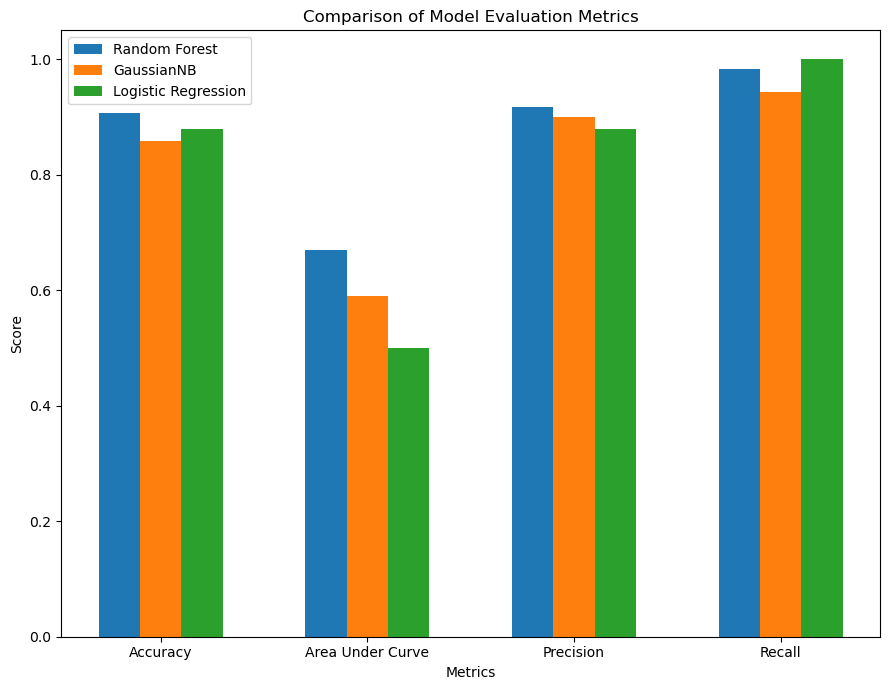

In [45]:
#Graphical Comparison of Model Performance
metrics = ["Accuracy","Area Under Curve", "Precision", "Recall"]
pred1 = [accuracy1, auc1, precision1, recall1]
pred2 = [accuracy2, auc2, precision2, recall2]
pred3 = [accuracy3, auc3, precision3, recall3]

# Plotting
bar_width = 0.2
index = np.arange(len(metrics))

plt.figure(figsize=(9, 7))

plt.bar(index - bar_width, pred1, width=bar_width, label='Random Forest')
plt.bar(index, pred2, width=bar_width, label='GaussianNB')
plt.bar(index + bar_width, pred3, width=bar_width, label='Logistic Regression')

plt.xticks(index, metrics)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Model Evaluation Metrics')

plt.legend()
plt.tight_layout()
plt.show()


Comments: The graph above provides a clear analysis of each model's perfomance, 


**Question 4. (Regression models)**  _(3 points)_
* Train two different regression models of your choice using the training set. Explain the rationale behind selecting each of these two algorithms. 



In [46]:
#Model One: Linear Regression
from sklearn.linear_model import LinearRegression
first_model = LinearRegression()
first_model.fit(reg_Xtrain, reg_ytrain)
first_ypredict = first_model.predict(reg_Xtest)

#Model Two SVR:
from sklearn.svm import SVR
second_model = SVR()
second_model.fit(reg_Xtrain, reg_ytrain)
second_ypredict = second_model.predict(reg_Xtest)


C:\Users\manah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Question 5. (Evaluation of regression models)**  _(3 points)_
* Evaluate the performance of your two regression models on the testing set using the following metrics: mean absolute error,mean squared error, and R-square.
* Based on the models evaluation results, what is the best model and why?



In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#First Model:
mean_abs_error1 = mean_absolute_error(reg_ytest, first_ypredict)
mean_sqr_error1 = mean_squared_error(reg_ytest, first_ypredict)
r_square1 = r2_score(reg_ytest, first_ypredict)

print(f"""
Linear Regression:
Mean Absolute Error: {round(mean_abs_error1, 3)}
Mean Squared Error: {round(mean_sqr_error1, 3)}
R-Squared Score: {round(r_square1, 3)}
""")

#Second Model:
mean_abs_error2 = mean_absolute_error(reg_ytest, second_ypredict)
mean_sqr_error2 = mean_squared_error(reg_ytest, second_ypredict)
r_square2 = r2_score(reg_ytest, second_ypredict)

print(f"""
SVR:
Mean Absolute Error: {round(mean_abs_error2, 3)}
Mean Squared Error: {round(mean_sqr_error2, 3)}
R-Squared Score: {round(r_square2, 3)}
""")



Linear Regression:
Mean Absolute Error: 0.164
Mean Squared Error: 0.04
R-Squared Score: 0.147


SVR:
Mean Absolute Error: 0.167
Mean Squared Error: 0.041
R-Squared Score: 0.122



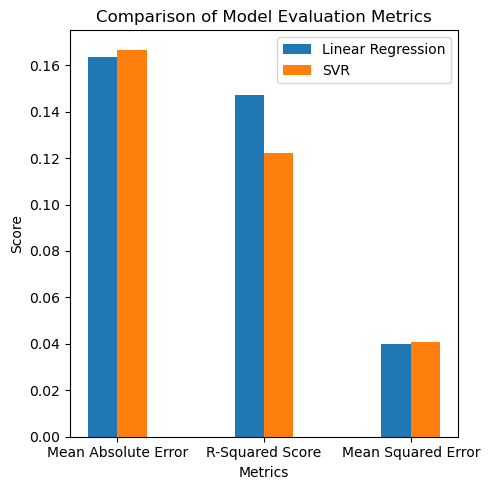

In [48]:
#Graphical Comparison of Model Performance
metrics = ["Mean Absolute Error", "R-Squared Score", "Mean Squared Error"]
pred1 = [mean_abs_error1, r_square1, mean_sqr_error1,]
pred2 = [mean_abs_error2, r_square2, mean_sqr_error2,]

# Plotting
bar_width = 0.2
index = np.arange(len(metrics))

plt.figure(figsize=(5, 5))

plt.bar(index - (bar_width / 2), pred1, width=bar_width, label='Linear Regression')
plt.bar(index + (bar_width / 2), pred2, width=bar_width, label='SVR')

plt.xticks(index, metrics)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Model Evaluation Metrics')

plt.legend()
plt.tight_layout()
plt.show()


Comments: Even though both models are not optimal, the overall performance of the Linear Regression model is better than that of SVR, since it has a higher R-Squared score as well as lower Mean Absolute/Squared Errors.

**Question 6. (Possible improvements)** _(1 points)_
* How can you improve the accuracy of your classification model?
* How can you improve the accuracy of your regression model?

Although the accuracy of all three classification models are already high, the Area Under Curve shows us that the overal model performance has room for improvement. Doing error analyses on the false positive and negative cases could help identify where the model is weaker prediction-wise. Adding or removing features from the model, more feature engineering, and not removing outliers could also make a difference.

The Mean Absolute and Mean Squared Errors were considerably low for both regression models, however, the R-Squared score was still lower than preferred. This can be improved via focusing on refining the features used by selecting only the relevant columns, and potentially collecting data about more patients in order to have a larger sample size.